## **Importing necessary libraries**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## **Loading & Cleaning Data**
**Load data csv file.**

In [5]:
import os
for dirname, _, filenames in os.walk('./data/transformed/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/transformed/Customer_transformed.csv
./data/transformed/Exchange_Rates_transformed.csv
./data/transformed/Merge_All_Data.csv
./data/transformed/Products_transformed.csv
./data/transformed/Sales_transformed.csv
./data/transformed/Stores_transformed.csv


In [6]:
all_data = pd.read_csv("./data/transformed/Merge_All_Data.csv")
all_data.head()

,Order_Number,Line_Item,Order_Date,Delivery_Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency_Code,Gender,...,Product_Unit_Cost,Product_Unit_Price,SubcategoryKey,Subcategory,CategoryKey,Category,Store_Country,Store_State,Store_Square_Meters,Store_Open_Date
0,366000,1,1/1/2016,Not Available,265598,10,1304,1,CAD,Male,...,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,4/4/2015
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD,Male,...,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,Not Available,1/1/2010
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD,Male,...,220.64,665.94,803,Microwaves,8,Home Appliances,Online,Online,Not Available,1/1/2010
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD,Female,...,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,Not Available,1/1/2010
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD,Female,...,166.20,326.00,301,Laptops,3,Computers,Online,Online,Not Available,1/1/2010


In [7]:
all_data.keys()

Index(['Order_Number', 'Line_Item', 'Order_Date', 'Delivery_Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency_Code',
       'Gender', 'Customer_Name', 'Customer_City', 'State_Code',
       'Customer_State', 'Customer_Zip_Code', 'Customer_Country',
       'Customer_Continent', 'Customer_Birthday', 'Product_Name',
       'Product_Brand', 'Product_Color', 'Product_Unit_Cost',
       'Product_Unit_Price', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category', 'Store_Country', 'Store_State', 'Store_Square_Meters',
       'Store_Open_Date'],
      dtype='object')

**Extract the main information about the dataframe**

In [8]:
df = all_data[['Order_Number', 'Order_Date', 'ProductKey', 'Product_Name', 'Subcategory', 'Category', 'Product_Brand', 'Product_Unit_Cost', 
               'Product_Unit_Price', 'Quantity', 'CustomerKey', 'Customer_Birthday', 'Gender', 'Customer_Name', 'Customer_City', 'State_Code',
               'Customer_State', 'Customer_Country', 'Customer_Continent', 'StoreKey', 'Store_State', 'Store_Country', 'Store_Open_Date']]
df.head()

,Order_Number,Order_Date,ProductKey,Product_Name,Subcategory,Category,Product_Brand,Product_Unit_Cost,Product_Unit_Price,Quantity,...,Customer_Name,Customer_City,State_Code,Customer_State,Customer_Country,Customer_Continent,StoreKey,Store_State,Store_Country,Store_Open_Date
0,366000,1/1/2016,1304,Contoso Lens Adapter M450 White,Cameras & Camcorders Accessories,Cameras and camcorders,Contoso,31.27,68.00,1,...,Tyler Vaught,London,ON,Ontario,Canada,North America,10,Nunavut,Canada,4/4/2015
1,366001,1/1/2016,1048,A. Datum SLR Camera X136 Silver,Digital SLR Cameras,Cameras and camcorders,A. Datum,141.47,427.00,2,...,Frank Upchurch,Auberry,CA,California,United States,North America,0,Online,Online,1/1/2010
2,366001,1/1/2016,2007,Fabrikam Microwave 1.5CuFt X1100 Black,Microwaves,Home Appliances,Fabrikam,220.64,665.94,1,...,Frank Upchurch,Auberry,CA,California,United States,North America,0,Online,Online,1/1/2010
3,366002,1/1/2016,1106,Contoso SLR Camera M146 Orange,Digital SLR Cameras,Cameras and camcorders,Contoso,148.08,322.00,7,...,Joan Roche,Red Deer,AB,Alberta,Canada,North America,0,Online,Online,1/1/2010
4,366002,1/1/2016,373,Adventure Works Laptop8.9 E0890 White,Laptops,Computers,Adventure Works,166.20,326.00,1,...,Joan Roche,Red Deer,AB,Alberta,Canada,North America,0,Online,Online,1/1/2010


In [9]:
# Number of rows and columns
df.shape

(62884, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order_Number        62884 non-null  int64  
 1   Order_Date          62884 non-null  object 
 2   ProductKey          62884 non-null  int64  
 3   Product_Name        62884 non-null  object 
 4   Subcategory         62884 non-null  object 
 5   Category            62884 non-null  object 
 6   Product_Brand       62884 non-null  object 
 7   Product_Unit_Cost   62884 non-null  float64
 8   Product_Unit_Price  62884 non-null  float64
 9   Quantity            62884 non-null  int64  
 10  CustomerKey         62884 non-null  int64  
 11  Customer_Birthday   62884 non-null  object 
 12  Gender              62884 non-null  object 
 13  Customer_Name       62884 non-null  object 
 14  Customer_City       62884 non-null  object 
 15  State_Code          62854 non-null  object 
 16  Cust

In [11]:
# Check missing values
df.isnull().any()

Order_Number          False
Order_Date            False
ProductKey            False
Product_Name          False
Subcategory           False
Category              False
Product_Brand         False
Product_Unit_Cost     False
Product_Unit_Price    False
Quantity              False
CustomerKey           False
Customer_Birthday     False
Gender                False
Customer_Name         False
Customer_City         False
State_Code             True
Customer_State        False
Customer_Country      False
Customer_Continent    False
StoreKey              False
Store_State           False
Store_Country         False
Store_Open_Date       False
dtype: bool

In [12]:
# Main metrics of the dataset
df.describe(include='all')

,Order_Number,Order_Date,ProductKey,Product_Name,Subcategory,Category,Product_Brand,Product_Unit_Cost,Product_Unit_Price,Quantity,...,Customer_Name,Customer_City,State_Code,Customer_State,Customer_Country,Customer_Continent,StoreKey,Store_State,Store_Country,Store_Open_Date
count,6.288400e+04,62884,62884.000000,62884,62884,62884,62884,62884.000000,62884.000000,62884.000000,...,62884,62884,62854,62884,62884,62884,62884.000000,62884,62884,62884
unique,NaN,1641,NaN,2492,32,8,11,NaN,NaN,NaN,...,11783,6570,448,491,8,3,NaN,58,9,23
top,NaN,12/21/2019,NaN,Adventure Works Desktop PC2.30 MD230 Black,Movie DVD,Computers,Contoso,NaN,NaN,NaN,...,Gaspare Trevisan,Toronto,CA,California,United States,North America,NaN,Online,United States,1/1/2010
freq,NaN,222,NaN,162,9169,14025,15953,NaN,NaN,NaN,...,36,683,3669,3629,33767,39182,NaN,13165,26555,18496
mean,1.430905e+06,NaN,1125.859344,NaN,NaN,NaN,NaN,116.253013,280.569848,3.144790,...,NaN,NaN,NaN,NaN,NaN,NaN,31.802144,NaN,NaN,NaN
std,4.532963e+05,NaN,709.244010,NaN,NaN,NaN,NaN,140.033327,382.827515,2.256371,...,NaN,NaN,NaN,NaN,NaN,NaN,22.978188,NaN,NaN,NaN
min,3.660000e+05,NaN,1.000000,NaN,NaN,NaN,NaN,0.480000,0.950000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,1.121017e+06,NaN,437.000000,NaN,NaN,NaN,NaN,22.050000,47.950000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
50%,1.498016e+06,NaN,1358.000000,NaN,NaN,NaN,NaN,79.530000,181.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,NaN,NaN
75%,1.788010e+06,NaN,1650.000000,NaN,NaN,NaN,NaN,138.420000,300.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,NaN,NaN


In [13]:
# Data types values of data
df.dtypes

Order_Number            int64
Order_Date             object
ProductKey              int64
Product_Name           object
Subcategory            object
Category               object
Product_Brand          object
Product_Unit_Cost     float64
Product_Unit_Price    float64
Quantity                int64
CustomerKey             int64
Customer_Birthday      object
Gender                 object
Customer_Name          object
Customer_City          object
State_Code             object
Customer_State         object
Customer_Country       object
Customer_Continent     object
StoreKey                int64
Store_State            object
Store_Country          object
Store_Open_Date        object
dtype: object

Data Cleaning for DataFrame

In [14]:
# StoreKey, OrderNumber, ProductKey and CustomerKey are IDs,
# no need to make operations on it, so let's transform those into string type
df['Order_Number'] = df['Order_Number'].astype("string")
df['CustomerKey'] = df['CustomerKey'].astype("string")
df['ProductKey'] = df['ProductKey'].astype("string")
df['StoreKey'] = df['StoreKey'].astype("string")

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\2132294337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Number'] = df['Order_Number'].astype("string")
C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\2132294337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerKey'] = df['CustomerKey'].astype("string")
C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\2132294337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [15]:
# Conversion of all element of the StoreOpenDate, Order Date and Birthday columns from string into date object
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Store_Open_Date'] = pd.to_datetime(df['Store_Open_Date'])
df['Customer_Birthday'] = pd.to_datetime(df['Customer_Birthday'])
df.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\3528577610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\3528577610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Store_Open_Date'] = pd.to_datetime(df['Store_Open_Date'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\3528577610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Order_Number,Order_Date,ProductKey,Product_Name,Subcategory,Category,Product_Brand,Product_Unit_Cost,Product_Unit_Price,Quantity,...,Customer_Name,Customer_City,State_Code,Customer_State,Customer_Country,Customer_Continent,StoreKey,Store_State,Store_Country,Store_Open_Date
0,366000,2016-01-01,1304,Contoso Lens Adapter M450 White,Cameras & Camcorders Accessories,Cameras and camcorders,Contoso,31.27,68.00,1,...,Tyler Vaught,London,ON,Ontario,Canada,North America,10,Nunavut,Canada,2015-04-04
1,366001,2016-01-01,1048,A. Datum SLR Camera X136 Silver,Digital SLR Cameras,Cameras and camcorders,A. Datum,141.47,427.00,2,...,Frank Upchurch,Auberry,CA,California,United States,North America,0,Online,Online,2010-01-01
2,366001,2016-01-01,2007,Fabrikam Microwave 1.5CuFt X1100 Black,Microwaves,Home Appliances,Fabrikam,220.64,665.94,1,...,Frank Upchurch,Auberry,CA,California,United States,North America,0,Online,Online,2010-01-01
3,366002,2016-01-01,1106,Contoso SLR Camera M146 Orange,Digital SLR Cameras,Cameras and camcorders,Contoso,148.08,322.00,7,...,Joan Roche,Red Deer,AB,Alberta,Canada,North America,0,Online,Online,2010-01-01
4,366002,2016-01-01,373,Adventure Works Laptop8.9 E0890 White,Laptops,Computers,Adventure Works,166.20,326.00,1,...,Joan Roche,Red Deer,AB,Alberta,Canada,North America,0,Online,Online,2010-01-01


In [16]:
df.dtypes

Order_Number          string[python]
Order_Date            datetime64[ns]
ProductKey            string[python]
Product_Name                  object
Subcategory                   object
Category                      object
Product_Brand                 object
Product_Unit_Cost            float64
Product_Unit_Price           float64
Quantity                       int64
CustomerKey           string[python]
Customer_Birthday     datetime64[ns]
Gender                        object
Customer_Name                 object
Customer_City                 object
State_Code                    object
Customer_State                object
Customer_Country              object
Customer_Continent            object
StoreKey              string[python]
Store_State                   object
Store_Country                 object
Store_Open_Date       datetime64[ns]
dtype: object

## **Exploratory Data Analysis**

In [17]:
# Let's calculate the age of the customers by difference between the latest order date and their birthdate
max_year = max(df["Order_Date"].dt.year)
df['Age'] = max_year - df['Customer_Birthday'].dt.year
df['Age'].head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\3854723195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = max_year - df['Customer_Birthday'].dt.year


0    50
1    26
2    26
3    59
4    59
Name: Age, dtype: int32

In [18]:
# Let's calculate Total Sales Amount for each line by doing Unit Price USD * Quantity
df['Total_Sales'] = df['Product_Unit_Price'] * df['Quantity']
df[['Product_Unit_Price', 'Quantity', 'Total_Sales']].head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\3888199058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Sales'] = df['Product_Unit_Price'] * df['Quantity']


,Product_Unit_Price,Quantity,Total_Sales
0,68.00,1,68.00
1,427.00,2,854.00
2,665.94,1,665.94
3,322.00,7,2254.00
4,326.00,1,326.00


### Store analysis
sales / profitability store vs online sales / profitability by store country (sales / profitability by store state / key)

In [19]:
# Let's first calculate total cost with the same reasoning we used for total sales amount
df['Total_Cost'] = df['Product_Unit_Cost'] * df['Quantity']
df[['Product_Unit_Cost', 'Quantity', 'Total_Cost']].head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\3123311082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Cost'] = df['Product_Unit_Cost'] * df['Quantity']


,Product_Unit_Cost,Quantity,Total_Cost
0,31.27,1,31.27
1,141.47,2,282.94
2,220.64,1,220.64
3,148.08,7,1036.56
4,166.20,1,166.20


In [20]:
# Now let's calculate profit, which is the difference between sales amount and cost
df['Profit'] = df['Total_Sales'] - df['Total_Cost']
df[['Total_Sales', 'Total_Cost', 'Profit']].head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\2344200032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'] = df['Total_Sales'] - df['Total_Cost']


,Total_Sales,Total_Cost,Profit
0,68.00,31.27,36.73
1,854.00,282.94,571.06
2,665.94,220.64,445.30
3,2254.00,1036.56,1217.44
4,326.00,166.20,159.80


In [21]:
# And now we can calculate total profitability, which is profit divided by sales amount
df['Total_Profitability'] = df['Profit'] / df['Total_Sales']
df[['Total_Sales', 'Profit', 'Total_Profitability']].head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\3244536996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Profitability'] = df['Profit'] / df['Total_Sales']


,Total_Sales,Profit,Total_Profitability
0,68.00,36.73,0.540147
1,854.00,571.06,0.668689
2,665.94,445.30,0.668679
3,2254.00,1217.44,0.540124
4,326.00,159.80,0.490184


#### Percentage of total sales by Online buy or In Store buy

In [22]:
# We also want to distinguish online vs in-store sales. A sale with a StoreKey value that is 0 is an online sale
df['StoreKey'].unique()

<StringArray>
['10',  '0', '38', '33', '43', '29',  '9', '66', '65', '41', '63', '56', '40',
 '18', '57', '28', '22', '31', '42', '47', '59',  '2', '50', '53', '51', '32',
 '64', '37',  '8', '20', '61', '24', '16', '15',  '4', '48',  '6', '30', '36',
 '19', '23', '27', '12',  '5', '55', '45', '44', '39', '17', '54', '34', '14',
 '13',  '1', '21', '49', '62', '26']
Length: 58, dtype: string

In [23]:
# Let's count the number of sales by each storeKey
df['StoreKey'].value_counts()

StoreKey
0     13165
9      1577
50     1519
55     1518
54     1498
61     1485
59     1472
45     1471
57     1442
44     1436
65     1395
8      1360
51     1356
64     1353
47     1348
43     1340
66     1295
48     1289
56     1287
53     1284
10     1269
39     1054
40     1050
36     1049
49     1041
38     1034
42     1017
29     1011
37      995
30      976
63      948
5       892
22      800
62      778
27      721
24      703
23      674
19      635
6       615
33      498
32      454
34      448
41      444
20      443
4       431
31      417
21      391
26      295
1       292
15      235
12      224
16      214
28      214
17      210
18      194
13      184
14      126
2        18
Name: count, dtype: Int64

In [24]:
# To make the analysis easier, let's create a "Online / In-Store" column,
# indicating if this is an online or an In-Store sale
df['Online_Vs_InStore'] = df['StoreKey'].apply(lambda x: "Online" if x=='0' else "In-Store")
df[['StoreKey', 'Online_Vs_InStore']].head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\3093395922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Online_Vs_InStore'] = df['StoreKey'].apply(lambda x: "Online" if x=='0' else "In-Store")


,StoreKey,Online_Vs_InStore
0,10,In-Store
1,0,Online
2,0,Online
3,0,Online
4,0,Online


In [25]:
# Now we can make online vs in-store analysis, looking at the sales :
Online_Vs_InStore_Data = df.groupby('Online_Vs_InStore')['Total_Sales'].sum().reset_index()
Online_Vs_InStore_Data

,Online_Vs_InStore,Total_Sales
0,In-Store,44351154.96
1,Online,11404324.63


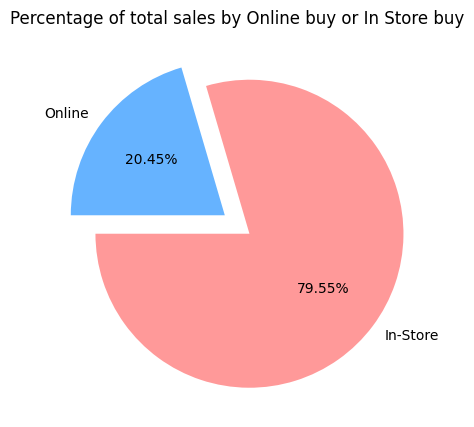

In [26]:
# Value & Lable
values = Online_Vs_InStore_Data['Total_Sales']
labels = Online_Vs_InStore_Data['Online_Vs_InStore']
colors = ['#ff9999', '#66b3ff']
explode = [0.1] * len(values)  # hoặc [0.3, 0.3] nếu bạn có đúng 2 nhóm

# pie chart
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, colors=colors, startangle=180, explode=explode, autopct='%1.2f%%')
plt.title("Percentage of total sales by Online buy or In Store buy")
plt.show()

**Conclusion**
- **Nearly 80%** of revenue comes from **in-store** sales. In-Store channel is still the main channel, need to maintain service quality and customer experience at the store.
- **Online channels** only contribute **about 20.5%** of total revenue, showing that online sales activities are not dominant. Need to invest more in online channels if you want to increase the proportion and take advantage of e-commerce trends.

In [27]:
# Let's have a look at the sales per store country
sales_by_store_country = df.groupby(['Store_Country'] , as_index=False).agg({'Total_Sales' : 'sum' , 'Total_Cost':'sum'})
sales_by_store_country = sales_by_store_country.sort_values(by='Total_Sales', ascending=False)

def convert_to_million(x):
    return round(x/1000000,2)

sales_by_store_country['Total_Sales'] = sales_by_store_country['Total_Sales'].apply(convert_to_million)
sales_by_store_country['Total_Cost'] = sales_by_store_country['Total_Cost'].apply(convert_to_million)
sales_by_store_country

,Store_Country,Total_Sales,Total_Cost
8,United States,23.76,9.84
6,Online,11.40,4.73
7,United Kingdom,5.75,2.40
3,Germany,4.25,1.75
1,Canada,3.61,1.51
0,Australia,2.10,0.86
4,Italy,2.06,0.85
5,Netherlands,1.59,0.65
2,France,1.23,0.50


#### Total sales & total cost by country store

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

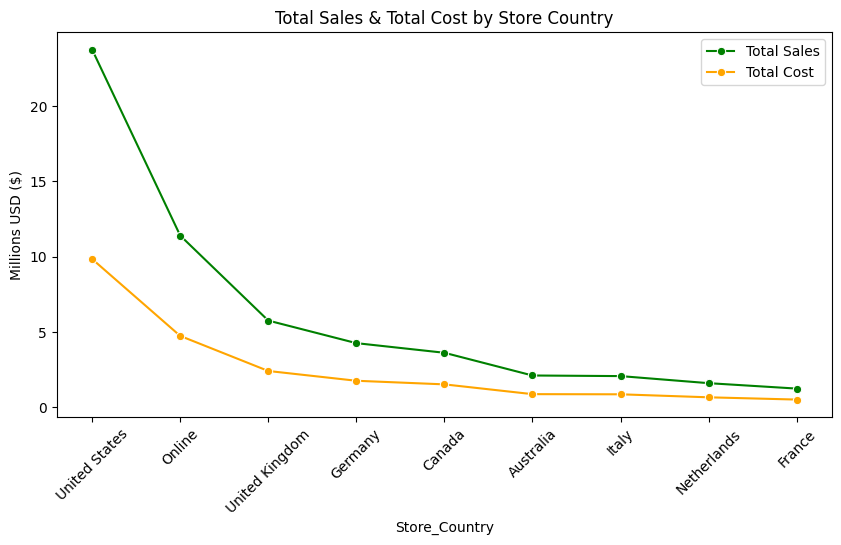

In [28]:
# Line plots for loan amount and total payment
plt.figure(figsize = (10,5))
sns.lineplot(data=sales_by_store_country, x='Store_Country', y='Total_Sales', marker='o', label='Total Sales', color='green')
sns.lineplot(data=sales_by_store_country, x='Store_Country', y='Total_Cost', marker='o', label='Total Cost', color='orange')
plt.ylabel("Millions USD ($)")
plt.tick_params(axis='y')
plt.title('Total Sales & Total Cost by Store Country')
plt.xticks(rotation=45)
plt.show()

**Conclusion**
- **United States** is the **leading market**:
  - Generates **$23.76 million** in sales, accounting for ~48.7% of total sales.
  - Also has **the highest total cost** at **$9.84 million**.
  
  -> **Key area for continued investment & growth**

- **Online sales** rank **2nd**, contributing **$11.40 million**, about 23.4% of total sales:
  - **Online cost** is **$4.73 million**.
  - Shows that online channel is significant and growing.
- **Top 3 markets** (US, Online, UK) together account for: 23.76+11.40+5.75= **$40.91 million** sales.
- **Smaller markets** (Germany, Canada, Australia, Italy, Netherlands, France) together contribute less than 20% of total sales.

#### Total Profit by Country Store

In [29]:
# Let's have a look at the sales per store country
profit_by_store_country = df.groupby(['Store_Country'] , as_index=False).agg({'Profit' : 'sum'})
profit_by_store_country = profit_by_store_country.sort_values(by='Profit', ascending=False)

def convert_to_million(x):
    return round(x/1000000,2)

profit_by_store_country['Profit'] = profit_by_store_country['Profit'].apply(convert_to_million)
profit_by_store_country

,Store_Country,Profit
8,United States,13.92
6,Online,6.67
7,United Kingdom,3.35
3,Germany,2.50
1,Canada,2.10
0,Australia,1.24
4,Italy,1.21
5,Netherlands,0.94
2,France,0.73


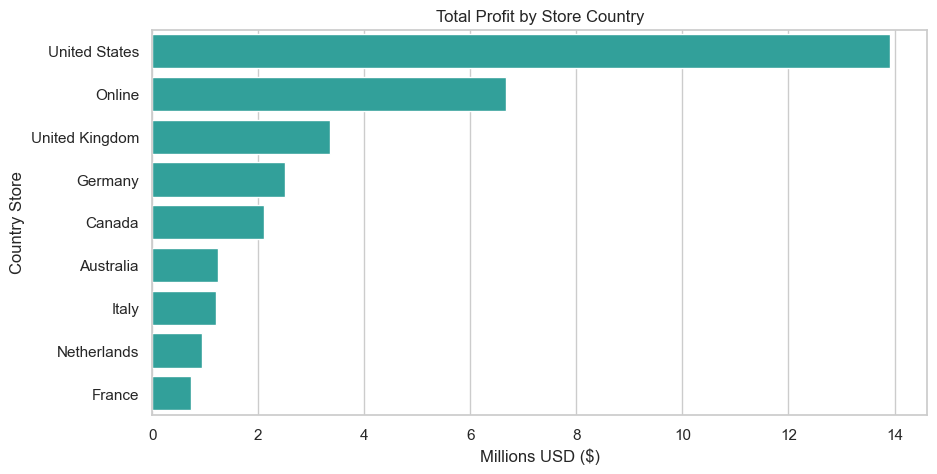

In [30]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 5))
sns.barplot(data=profit_by_store_country, x='Profit', y='Store_Country', color='lightseagreen')
plt.xlabel("Millions USD ($)")
plt.ylabel("Country Store")
plt.title('Total Profit by Store Country')
plt.yticks()
plt.show()

**Conclusion**
- **United States** is the **highest profit sales**:
  - Generates **$13.92 million** in profit sales, accounting for ~42.6% of total profit sales.
- **Online sales** rank **2nd**
  - Contributing **$6.67 million**, about 20.4% of total profit sales:

### **Orders & Sales analysis**

In [31]:
## Add Order Month & Year
df['Order_Month'] = df['Order_Date'].dt.month_name()
df['Order_Year'] = df['Order_Date'].dt.year
df[['Order_Date', 'Order_Month', 'Order_Year']].head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\1731628008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Month'] = df['Order_Date'].dt.month_name()


,Order_Date,Order_Month,Order_Year
0,2016-01-01,January,2016
1,2016-01-01,January,2016
2,2016-01-01,January,2016
3,2016-01-01,January,2016
4,2016-01-01,January,2016


#### Total Orders & Total Sales by Month and Year

In [32]:
#The oldest date and the latest date Order Sales
print(df['Order_Date'].min())
print(df['Order_Date'].max())

2016-01-01 00:00:00
2021-02-20 00:00:00


In [33]:
sales_data =  df.groupby(['Order_Month', 'Order_Year'] , as_index=False).agg({'Order_Number':pd.Series.nunique, 'Total_Sales' : 'sum', 'Profit': 'sum'})
sales_data

,Order_Month,Order_Year,Order_Number,Total_Sales,Profit
0,April,2016,41,110591.63,66231.19
1,April,2017,26,58580.07,35064.72
2,April,2018,43,70627.54,40831.40
3,April,2019,75,149892.71,88472.45
4,April,2020,80,217642.10,128029.54
...,...,...,...,...,...
57,September,2016,262,567421.12,331859.55
58,September,2017,286,686375.10,400005.58
59,September,2018,561,1181765.14,686330.14
60,September,2019,781,1547870.73,906551.14


In [34]:
# Sort Month value
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Get years value
years = sales_data['Order_Year'].unique()

# Tạo traces cho từng năm (ẩn đi, chỉ hiện trace ban đầu)
traces = []
for year in years:
    sales_data_a_year = sales_data[sales_data['Order_Year'] == year]
    sales_data_a_year.sort_values('Order_Month' , key = lambda x : x.apply(lambda y : month_dict[y]) , inplace = True)

    traces.append(go.Bar(
        x=sales_data_a_year['Order_Month'],
        y=sales_data_a_year['Order_Number'],
        name=f"Total Orders ({year})",
        marker_color='skyblue',
        visible=(year == years[0]),  # chỉ hiện năm đầu
        yaxis='y1'
    ))

    traces.append(go.Scatter(
        x=sales_data_a_year['Order_Month'],
        y=sales_data_a_year['Total_Sales'],
        name=f"Total Sales ({year})",
        mode='lines+markers',
        marker=dict(color='darksalmon'),
        visible=(year == years[0]),
        yaxis='y2'
    ))

# Tạo buttons lọc theo năm
buttons = []
for i, year in enumerate(years):
    # Có 2 trace mỗi năm (Bar + Line), mỗi lần chọn sẽ bật đúng 2 trace
    visibility = [False] * len(traces)
    visibility[2*i] = True     # bar
    visibility[2*i+1] = True   # line
    
    buttons.append(dict(
        label=str(year),
        method='update',
        args=[{'visible': visibility},
              {'title': f'Total Orders vs Total Sales - {year}'}]
    ))

# Layout và menu
layout = go.Layout(
    title=f"Total Orders vs Total Sales - {years[0]}",
    xaxis=dict(title='Month'),
    yaxis=dict(title='Total Orders', side='left'),
    yaxis2=dict(title='Total Sales USD ($)', overlaying='y', side='right'),
    bargap=0.3,
    template='simple_white',
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction='down',
        x=0.0,
        y=1.15,
        showactive=True
    )]
)

# Tạo figure
fig = go.Figure(data=traces, layout=layout)
fig.update_layout(width=1000, height=500)
fig.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\1513678408.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_a_year.sort_values('Order_Month' , key = lambda x : x.apply(lambda y : month_dict[y]) , inplace = True)


**Conclusion**
- **2016 - 2019**:
  - **The highest total order & sales** in **January, February and December**. Shopping demand increases due to holidays at the end of the year and the beginning of the year. **Ensure sufficient quantity of goods and human resources for this period**.
  - **The lowest total order & sales** in **March and April**. Drive shopping demand with promotions and improve marketing strategies.

- **2020 - 2021**:
  - **The highest total order & sales** in **January, February 2020**. **The impact of the covid pandemic** has increased the need for shopping to facilitate online learning and working while staying at home.
  - **The total order & sales** significantly **reduced** in the **remaining months**.

#### Total Profit Sales by Month and Year

In [35]:
# Sort Month value
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Get years value
years = sales_data['Order_Year'].unique()

# Tạo traces cho từng năm (ẩn đi, chỉ hiện trace ban đầu)
traces = []
for year in years:
    sales_data_a_year = sales_data[sales_data['Order_Year'] == year]
    sales_data_a_year.sort_values('Order_Month' , key = lambda x : x.apply(lambda y : month_dict[y]) , inplace = True)

    traces.append(go.Bar(
        x=sales_data_a_year['Order_Month'],
        y=sales_data_a_year['Profit'],
        name=f"Total Profit ({year})",
        marker_color='mediumaquamarine',
        visible=(year == years[0]),  # chỉ hiện năm đầu
        yaxis='y1'
    ))

# Tạo buttons lọc theo năm
buttons = []
for i, year in enumerate(years):
    visibility = [False] * len(traces)
    visibility[i] = True     # bar
    
    buttons.append(dict(
        label=str(year),
        method='update',
        args=[{'visible': visibility},
              {'title': f'Total Profit - {year}'}]
    ))

# Layout và menu
layout = go.Layout(
    title=f"Total Profit - {years[0]}",
    xaxis=dict(title='Month'),
    yaxis=dict(title='Total Profit', side='left'),
    bargap=0.3,
    template='simple_white',
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction='down',
        x=0.0,
        y=1.15,
        showactive=True
    )]
)

# Tạo figure
fig = go.Figure(data=traces, layout=layout)
fig.update_layout(width=1000, height=500)
fig.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\2097853911.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Products & Category analysis

In [36]:
product_category_group_data =  df.groupby(['Category'] , as_index=False).agg({'Quantity':'sum', 'Total_Sales' : 'sum'})
product_category_group_data

,Category,Quantity,Total_Sales
0,Audio,23490,3169627.74
1,Cameras and camcorders,17609,6520168.02
2,Cell phones,31477,6183791.22
3,Computers,44151,19301595.46
4,Games and Toys,22591,724829.43
5,Home Appliances,18401,10795478.59
6,"Music, Movies and Audio Books",28802,3131006.44
7,TV and Video,11236,5928982.69


In [37]:
product_category_group_data['Mean_Price'] = product_category_group_data['Total_Sales'] / product_category_group_data['Quantity']
product_category_group_data = product_category_group_data.sort_values(by='Total_Sales', ascending=False)
product_category_group_data

,Category,Quantity,Total_Sales,Mean_Price
3,Computers,44151,19301595.46,437.172328
5,Home Appliances,18401,10795478.59,586.678908
1,Cameras and camcorders,17609,6520168.02,370.274747
2,Cell phones,31477,6183791.22,196.454275
7,TV and Video,11236,5928982.69,527.677349
0,Audio,23490,3169627.74,134.935195
6,"Music, Movies and Audio Books",28802,3131006.44,108.707952
4,Games and Toys,22591,724829.43,32.084876


#### Total Sales & Quantity Product sold by Category

In [38]:
traces = []
traces.append(go.Bar(
        x=product_category_group_data['Category'],
        y=product_category_group_data['Quantity'],
        name=f"Total Quantity",
        marker_color='skyblue',
        yaxis='y1'
    ))
traces.append(go.Scatter(
        x=product_category_group_data['Category'],
        y=product_category_group_data['Total_Sales'],
        name=f"Total Sales",
        mode='lines+markers',
        marker=dict(color='darksalmon'),
        yaxis='y2'
    ))

# Layout và menu
layout = go.Layout(
    title=f"Total Quantity & Total Orders by Product Category",
    xaxis=dict(title='Category'),
    yaxis=dict(title='Quantity', side='left'),
    yaxis2=dict(title='Total Sales USD ($)', overlaying='y', side='right'),
    bargap=0.3,
    template='simple_white',
)

# Tạo figure
fig = go.Figure(data=traces, layout=layout)
fig.update_layout(width=1000, height=500)
fig.show()

**Conclusion**
- **The highest total quantity product sold & total product sales** is **Computers** category.
  - **Total quantity product sold** over **44K**.
  - **Total product sales** over **$19.3M**.
- Followed by **Home Appliances, Cameras and camcorders; Cell phones; and TV and Video.**
- **The lowest total quantity product sold & total product sales** is **Audio; Music, Movies and Audio Books; and Games and Toys** category.
  - Although the quantity products sold is high (Over 22K), the total sales are low (Less $3.2M) because the value of these products is quite low compared to other products.

#### Mean Price by Category

In [41]:
# Let's visualize mean price per product category :
product_category_group_data = product_category_group_data.sort_values(by='Mean_Price', ascending=False)

fig = go.Figure(go.Bar(
            x=product_category_group_data['Category'],
            y=product_category_group_data['Mean_Price'],
            orientation='v',
            marker_color='lightcoral'))

fig.update_layout(title="Mean Price per product category",
                  xaxis=dict(title='Category'),
                  yaxis=dict(title='Mean Price USD ($)', side='left'),
                  bargap=0.3,
                  template='simple_white')

fig.show()

**Conclusion**
- **The highest mean price** of product category is **Home Appliances**. About **$586.7**
- Followed by **TV and Video (About $527,7); Computers (About $437,2); and Cameras and camcorders (About $370,3)**.
- **The lowest mean price** of product category is **Cell phones (About $196.5); Audio (About $134.9); Music, Movies and Audio Books (About $108.7); Games and Toys (About $32.1)**.

#### Total Sales & Quantity Product Sold by "Home Appliances" Subcategory

In [42]:
product_subcategory_group_data =  df[df['Category'] == 'Home Appliances'].groupby(['Subcategory'] , as_index=False).agg({'Quantity':'sum', 'Total_Sales' : 'sum'})
product_subcategory_group_data = product_subcategory_group_data.sort_values(by='Total_Sales', ascending=False)
product_subcategory_group_data

,Subcategory,Quantity,Total_Sales
7,Water Heaters,4563,3547822.50
5,Refrigerators,2324,2152664.41
6,Washers & Dryers,1180,2119847.40
1,Coffee Machines,2295,1167739.71
4,Microwaves,4750,1101482.95
0,Air Conditioners,884,333585.16
3,Lamps,1164,272965.96
2,Fans,1241,99370.50


In [43]:
traces = []
traces.append(go.Bar(
        x=product_subcategory_group_data['Subcategory'],
        y=product_subcategory_group_data['Quantity'],
        name=f"Total Quantity",
        marker_color='darkseagreen',
        yaxis='y1'
    ))
traces.append(go.Scatter(
        x=product_subcategory_group_data['Subcategory'],
        y=product_subcategory_group_data['Total_Sales'],
        name=f"Total Sales",
        mode='lines+markers',
        marker=dict(color='steelblue'),
        yaxis='y2'
    ))

# Layout và menu
layout = go.Layout(
    title=f"Total Quantity & Total Orders by Product SubCategory",
    xaxis=dict(title='SubCategory'),
    yaxis=dict(title='Quantity', side='left'),
    yaxis2=dict(title='Total Sales USD ($)', overlaying='y', side='right'),
    bargap=0.3,
    template='simple_white',
)

# Tạo figure
fig = go.Figure(data=traces, layout=layout)
fig.update_layout(width=1000, height=500)
fig.show()

**Conclusion**
- **Water Heaters; Refrigerators; and Washers and Dryers** are **high-ticket items** → critical for revenue.
  - **Water Heaters** generated the highest sales: **$3.55M**.
  - Followed by **Refrigerator**s (**$2.15M**) and **Washers & Dryers** (**$2.12M**).
- **Microwaves** have **high sales volume** but **lower revenue/unit** → could explore upselling, premium models.
  - **Microwaves** had the highest quantity sold: **4,750 units**.
- **Fans & Lamps** have **lowest** contribution to total sales → may need promotion or repositioning.

In [44]:
# Total sales by brand and by product category
sales_by_brand_and_category = df.groupby(['Product_Brand', 'Category'])['Total_Sales'].sum().reset_index()
sales_by_brand_and_category = sales_by_brand_and_category.sort_values(by=['Total_Sales'], ascending = False)
sales_by_brand_and_category

,Product_Brand,Category,Total_Sales
1,Adventure Works,Computers,7140884.95
27,Wide World Importers,Computers,6917955.15
25,The Phone Company,Cell phones,5386820.00
8,Contoso,Home Appliances,5270177.88
3,Adventure Works,TV and Video,4308719.19
11,Fabrikam,Cameras and camcorders,4025223.40
18,Proseware,Computers,2980935.75
14,Litware,Home Appliances,2268130.48
26,Wide World Importers,Audio,2186244.15
13,Fabrikam,Home Appliances,1935083.27


### Customers analysis

In [45]:
# How many unique customers are there in the dataset ?
df['CustomerKey'].nunique()

11887

In [46]:
# Get sales by customer and their main information
sales_by_customer = df.groupby(['CustomerKey', 'Gender', 'Age', 'Customer_Country', 'Customer_State'])['Total_Sales'].sum().reset_index()
sales_by_customer = sales_by_customer.sort_values(by=['Total_Sales'], ascending = False)
sales_by_customer

,CustomerKey,Gender,Age,Customer_Country,Customer_State,Total_Sales
4578,1702221,Male,85,United States,California,61871.70
5792,1884663,Female,51,United States,Louisiana,43517.80
6386,1969704,Female,60,United States,Georgia,42788.04
9310,535496,Female,39,Germany,Freistaat Bayern,41521.53
9416,551036,Male,68,Germany,Schleswig-Holstein,40556.54
...,...,...,...,...,...,...
9636,587974,Female,63,Germany,Freistaat Sachsen,3.35
5731,187544,Female,52,Australia,New South Wales,3.35
3227,1505785,Female,30,United States,Colorado,3.35
1157,1203443,Male,49,United States,Utah,3.35


In [47]:
sales_by_customer['Age'].describe()

count    11887.000000
mean        52.686801
std         19.341944
min         19.000000
25%         36.000000
50%         53.000000
75%         69.000000
max         86.000000
Name: Age, dtype: float64

In [48]:
# Add age group column
def age_group(x):
    if x <= 25:
        return "19-25"
    if x <= 35:
        return "26-35"
    if x <= 45:
        return "36-45"
    if x <= 55:
        return "46-55"
    if x <= 65:
        return "56-65"
    else:
        return "66 and more"
sales_by_customer['Age_Group'] = sales_by_customer['Age'].apply(age_group)
sales_by_customer.head()

,CustomerKey,Gender,Age,Customer_Country,Customer_State,Total_Sales,Age_Group
4578,1702221,Male,85,United States,California,61871.70,66 and more
5792,1884663,Female,51,United States,Louisiana,43517.80,46-55
6386,1969704,Female,60,United States,Georgia,42788.04,56-65
9310,535496,Female,39,Germany,Freistaat Bayern,41521.53,36-45
9416,551036,Male,68,Germany,Schleswig-Holstein,40556.54,66 and more


#### Customer Gender Percentage

In [49]:
customer_gender_data = sales_by_customer.groupby(by='Gender')['CustomerKey'].count().reset_index()
customer_gender_data

,Gender,CustomerKey
0,Female,5858
1,Male,6029


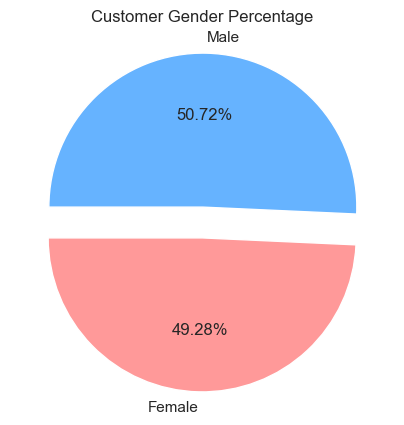

In [50]:
# Value & Lable
values = customer_gender_data['CustomerKey']
labels = customer_gender_data['Gender']
colors = ['#ff9999', '#66b3ff']
explode = [0.1] * len(values)  # hoặc [0.3, 0.3] nếu bạn có đúng 2 nhóm

# pie chart
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, colors=colors, startangle=180, explode=explode, autopct='%1.2f%%')
plt.title("Customer Gender Percentage")
plt.show()

**Conclusion**
- **The gender ratio** of customers is quite **equal**:
  - Male: About 50.72%
  - Female: About 49.28%

#### Total Customer by Age Group

In [51]:
age_group_data = sales_by_customer.groupby(by='Age_Group')['CustomerKey'].count().reset_index()
age_group_data = age_group_data.sort_values('CustomerKey', ascending=False)
age_group_data

,Age_Group,CustomerKey
5,66 and more,3663
2,36-45,1797
4,56-65,1796
1,26-35,1771
3,46-55,1743
0,19-25,1117


In [52]:
fig = go.Figure(go.Bar(
            x=age_group_data['Age_Group'],
            y=age_group_data['CustomerKey'],
            orientation='v',
            marker_color='mediumpurple'))

fig.update_layout(title="Total Customer by Age Group",
                  xaxis=dict(title='Age Group'),
                  yaxis=dict(title='Total Customers', side='left'),
                  bargap=0.3,
                  template='simple_white')

fig.show()

**Conclusion**
- **The older customer group is the majority**:
  - The "**66 and more**" group has 3,663 customers → accounting for ~32% of the total number of customers.
  - May need a marketing strategy suitable for this age group.
- The age groups from **26-65** are relatively even (about 1,700 - 1,800 customers each group).
  - The 26-55 group is a stable middle-aged group, need to retain them through loyalty programs or family incentives.
- The younger group (19-25) accounts for the least, only 1,117 customers → accounting for ~10% of the total number of customers.
  - The young group is nearly 2 times smaller than the older group → this group may not be well reached.
  - It is necessary to consider sales channels, products, and communications suitable for the young group to increase the number of customers.

#### Total Customer by Country

In [53]:
# The number of customers per country
customers_country_data = sales_by_customer.groupby('Customer_Country')['CustomerKey'].count().reset_index()
customers_country_data = customers_country_data.sort_values(by=['CustomerKey'], ascending = False)
customers_country_data

,Customer_Country,CustomerKey
7,United States,5706
6,United Kingdom,1570
1,Canada,1179
3,Germany,1150
0,Australia,780
5,Netherlands,534
4,Italy,530
2,France,438


In [54]:
fig = go.Figure(go.Bar(
            x=customers_country_data['Customer_Country'],
            y=customers_country_data['CustomerKey'],
            orientation='v',
            marker_color='peru'))

fig.update_layout(title="Total Customer by Country",
                  xaxis=dict(title='Country'),
                  yaxis=dict(title='Total Customers', side='left'),
                  bargap=0.3,
                  template='simple_white')

fig.show()

Conclusion
- **The United States dominates** total customer:
  - Holds **5,706 customers**, accounting for ~55.9% of total customers.
  - More than **3.5 times** larger than **the second largest** market (United Kingdom).
  
  -> US is the core market - needs retention strategies & personalized marketing to keep this large customer base.
- Followed by **United Kingdom, Canada, Germany and Australia.**
  - Opportunity to grow UK, Canada, Germany and Australia as they already show meaningful presence.
- Emerging markets (Netherlands, Italy, France) → may need more marketing investment or product adaptation.

#### Total customers by state in the US

In [55]:
sales_by_customer_US = sales_by_customer[sales_by_customer['Customer_Country'] == "United States"]
sales_by_customer_US.head()

,CustomerKey,Gender,Age,Customer_Country,Customer_State,Total_Sales,Age_Group
4578,1702221,Male,85,United States,California,61871.70,66 and more
5792,1884663,Female,51,United States,Louisiana,43517.80,46-55
6386,1969704,Female,60,United States,Georgia,42788.04,56-65
6092,1928466,Male,64,United States,Pennsylvania,38191.06,56-65
3217,1503831,Female,59,United States,Wisconsin,37319.88,56-65


#### Total customers by state in the US by using a group by

In [56]:
customers_state_US = sales_by_customer_US.groupby('Customer_State')['CustomerKey'].count().reset_index()
customers_state_US = customers_state_US.sort_values(by=['CustomerKey'], ascending=False)
customers_state_US

,Customer_State,CustomerKey
4,California,582
42,Texas,458
31,New York,360
8,Florida,294
12,Illinois,280
37,Pennsylvania,223
34,Ohio,220
21,Michigan,214
29,New Jersey,177
20,Massachusetts,175


In [57]:
fig = go.Figure(go.Bar(
            x=customers_state_US['Customer_State'],
            y=customers_state_US['CustomerKey'],
            orientation='v',
            marker_color='lightseagreen'))

fig.update_layout(title="Total Customer by State in United State",
                  xaxis=dict(title='State (In US)'),
                  yaxis=dict(title='Total Customers', side='left'),
                  bargap=0.3,
                  template='simple_white')

fig.show()

In [58]:
df.head()

,Order_Number,Order_Date,ProductKey,Product_Name,Subcategory,Category,Product_Brand,Product_Unit_Cost,Product_Unit_Price,Quantity,...,Store_Country,Store_Open_Date,Age,Total_Sales,Total_Cost,Profit,Total_Profitability,Online_Vs_InStore,Order_Month,Order_Year
0,366000,2016-01-01,1304,Contoso Lens Adapter M450 White,Cameras & Camcorders Accessories,Cameras and camcorders,Contoso,31.27,68.00,1,...,Canada,2015-04-04,50,68.00,31.27,36.73,0.540147,In-Store,January,2016
1,366001,2016-01-01,1048,A. Datum SLR Camera X136 Silver,Digital SLR Cameras,Cameras and camcorders,A. Datum,141.47,427.00,2,...,Online,2010-01-01,26,854.00,282.94,571.06,0.668689,Online,January,2016
2,366001,2016-01-01,2007,Fabrikam Microwave 1.5CuFt X1100 Black,Microwaves,Home Appliances,Fabrikam,220.64,665.94,1,...,Online,2010-01-01,26,665.94,220.64,445.30,0.668679,Online,January,2016
3,366002,2016-01-01,1106,Contoso SLR Camera M146 Orange,Digital SLR Cameras,Cameras and camcorders,Contoso,148.08,322.00,7,...,Online,2010-01-01,59,2254.00,1036.56,1217.44,0.540124,Online,January,2016
4,366002,2016-01-01,373,Adventure Works Laptop8.9 E0890 White,Laptops,Computers,Adventure Works,166.20,326.00,1,...,Online,2010-01-01,59,326.00,166.20,159.80,0.490184,Online,January,2016


In [61]:
df.keys()

Index(['Order_Number', 'Order_Date', 'ProductKey', 'Product_Name',
       'Subcategory', 'Category', 'Product_Brand', 'Product_Unit_Cost',
       'Product_Unit_Price', 'Quantity', 'CustomerKey', 'Customer_Birthday',
       'Gender', 'Customer_Name', 'Customer_City', 'State_Code',
       'Customer_State', 'Customer_Country', 'Customer_Continent', 'StoreKey',
       'Store_State', 'Store_Country', 'Store_Open_Date', 'Age', 'Total_Sales',
       'Total_Cost', 'Profit', 'Total_Profitability', 'Online_Vs_InStore',
       'Order_Month', 'Order_Year'],
      dtype='object')

In [59]:
# Store all data transformed
df.to_csv("./data/transformed/data_transformed.csv", index=False)

#### Customer Segmetation RFM Model

In [63]:
import pyodbc

In [64]:
def connection_sql_server(cnxn_str):
    try:
        cnxn = pyodbc.connect(cnxn_str)
        print ("Success connection")
        cursor = cnxn.cursor()
        return cnxn, cursor
    except Exception as e:
        print("Error connection: " + str(e))

def run_query(cnxn, query):
    ''' This function runs the query on the database table and
    prints the output on the terminal. Function returns nothing. '''
    try:
        df = pd.read_sql(query, cnxn)
        return df
    except Exception as e:
        print("Error while selecting data table" + str(e))

In [65]:
server = "localhost\SQLEXPRESS"
database = "GlobalElectronicsRetailerDB"
cnxn_str = ("Driver={ODBC Driver 17 for SQL Server};"
                      "Server="+ server +";"
                      "Database="+ database +";"
                      "Trusted_Connection=yes;")

In [66]:
cnxn, cursor = connection_sql_server(cnxn_str)

Success connection


In [68]:
query = """SELECT * FROM customer_segmentation_rfm"""

df_customer_seg_rfm = run_query(cnxn, query)
print(df_customer_seg_rfm.head())

C:\Users\Acer\AppData\Local\Temp\ipykernel_41988\540215839.py:14: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



  CustomerKey  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0      356810      734          1      1.99        2        2        1   
1     1505785      360          1      3.35        4        2        1   
2      587974      302          1      3.35        5        2        1   
3     1203443     1121          1      3.35        1        1        1   
4      187544      784          1      3.35        2        1        1   

  RFM_Score  
0       221  
1       421  
2       521  
3       111  
4       211  


Creating RFM Segments

In [69]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_To_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

Explain segmentation name:

1. **hibernating (`r'[1-2][1-2]'`)**
- **Condition**: Customers whose RFM scores start with a number of 1 or 2 for both Recency and Frequency.

- **Explanation**: These are customers with low shopping activity and have not made a transaction for a long time (low Recency). They may have been "hibernating", participating in few transactions recently.

2. **at_Risk (`r'[1-2][3-4]'`)**
- **Condition**: Low Recency (1-2) and relatively high Frequency (3-4).

- **Explanation**: These are customers who have had a high shopping frequency in the past, but have not made a purchase for a long time. They are at risk of leaving without a re-engagement strategy.

3. **cant_loose (`r'[1-2]5'`)**
- **Condition**: Low Recency (1-2) and Very High Monetary (5).
- **Explanation**: These are customers who have not transacted for a long time but have spent a lot in the past. This is an important customer group that businesses cannot afford to lose. Special strategies are needed to retain them.

4. **about_to_sleep (`r'3[1-2]'`)**
- **Condition**: High Frequency (3) and Low Recency (1-2).
- **Explanation**: This is a group of customers with a stable shopping frequency but have had little interaction recently. They may be "hibernating" and need attention so as not to lose them.

5. **need_attention (`r'33'`)**
- **Condition**: Both Recency and Frequency scores are 3.
- **Explanation**: This is a group of customers with a stable level of activity. However, they may need attention or care to maintain the relationship, avoiding being forgotten.

6. **loyal_customers (`r'[3-4][4-5]'`)**
- **Condition**: High Recency and Frequency (3-4 and 4-5).
- **Explanation**: These customers have a high level of engagement and regular purchase frequency, and have high spending. This is a group of loyal customers, likely to continue purchasing in the future.

7. **promising (`r'41'`)**
- **Condition**: High Recency (4) and low Frequency (1).
- **Explanation**: This is a group of customers who are new to the market or have only recently made a purchase but have a high spending potential. This is a group with high potential if approached and cared for properly.

8. **new_customers (`r'51'`)**
- **Condition**: Very high Recency (5) and low Frequency (1).

- **Explanation**: These are customers who are new to the market or have recently made a transaction. They have the potential to become loyal customers if cared for properly in the early stages.

9. **potential_loyalists (`r'[4-5][2-3]'`)**
- **Condition**: High Recency (4-5) and Medium Frequency (2-3).

- **Explanation**: These are customers who have the potential to become loyal customers. They have recently made a purchase and have a stable shopping frequency, but have not spent much.

10. **champions (`r'5[4-5]'`)**
- **Condition**: Very high Recency (5) and high Frequency, Monetary (4-5).
- **Explanation**: This is the best group of customers, with both recent shopping activity, high shopping frequency and high spending. They are the "heroes" of the business, the most loyal and valuable customers.

As the monetary is a similar value to frequency, it is not considered in scoring. Recency and frequency points are obtained with the following code:
- To segment the customers using “Recency” and “Frequency” values.

In [70]:
df_customer_seg_rfm['RFM_Segment'] = df_customer_seg_rfm['R_Score'].astype(str) + df_customer_seg_rfm['F_Score'].astype(str)
df_customer_seg_rfm['RFM_Segment'].head()

0    22
1    42
2    52
3    11
4    21
Name: RFM_Segment, dtype: object

In [71]:
#Creating Segment Variable 
df_customer_seg_rfm['RFM_Segment'] = df_customer_seg_rfm['RFM_Segment'].replace(seg_map, regex=True)
df_customer_seg_rfm.head()

,CustomerKey,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment
0,356810,734,1,1.99,2,2,1,221,Hibernating
1,1505785,360,1,3.35,4,2,1,421,Potential_Loyalists
2,587974,302,1,3.35,5,2,1,521,Potential_Loyalists
3,1203443,1121,1,3.35,1,1,1,111,Hibernating
4,187544,784,1,3.35,2,1,1,211,Hibernating


In [72]:
#Descriptive Statistics of RFM Segments 
df_customer_seg_rfm[['RFM_Segment', 'Recency', 'Frequency', 'Monetary']].groupby("RFM_Segment").agg(['mean', 'count'])

Recency       Frequency           Monetary      
                            mean count      mean count         mean count
RFM_Segment                                                              
About_To_Sleep        518.481928   747  1.000000   747  1979.583531   747
At_Risk               868.842990  1726  2.268830  1726  5046.845261  1726
Cant_Loose            753.846561   189  4.296296   189  8909.785706   189
Champions             151.495753  1295  4.109653  1295  8678.858074  1295
Hibernating          1105.703273  2841  1.000000  2841  2234.067087  2841
Loyal_Customers       439.032393  1914  3.847962  1914  8035.565236  1914
Need_Attention        512.789277   802  2.000000   802  4032.902752   802
Potential_Loyalists   287.335019  2373  1.567214  2373  3236.982949  2373

In [73]:
import plotly.express as px
#Top 10 most preferred products
segments = df_customer_seg_rfm['RFM_Segment'].value_counts()

fig = px.bar(
    x = segments.index,
    y = segments.values,
    color = segments.index,
    text = segments.values,
    title = "RFM Segments"
)
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)
fig.show()

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



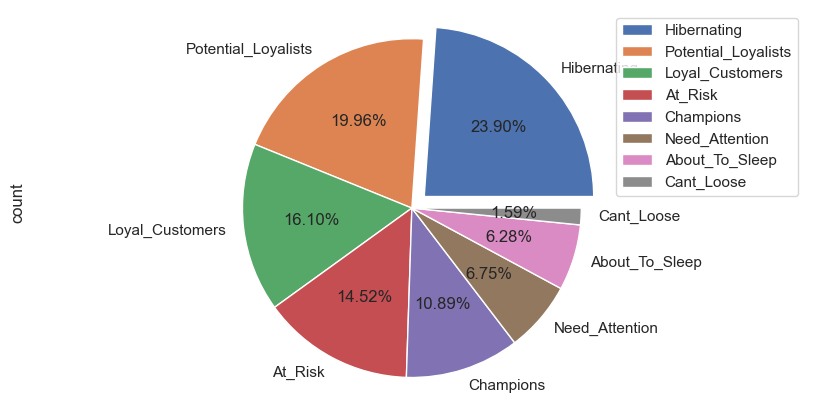

In [77]:
plt.figure(figsize = (10, 5), )
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)

segments.plot(
    kind = 'pie',
    color=segments.index,
    explode = explode,
    autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(labels = segments.index, loc = "best")
plt.show()